### Let's first change the sas7bdat file to CSV

In [2]:
# I import pandas to work with data in a tabular form.
import pandas as pd

# I import SAS7BDAT from sas7bdat to read SAS files in Python.
from sas7bdat import SAS7BDAT

# I define a function to convert a SAS file to a CSV file, which takes a SAS file name and a CSV file name as inputs.
def sas_to_csv(sas_filename, csv_filename):
    # I use 'with' to ensure the SAS file is properly managed and closed after use.
    with SAS7BDAT(sas_filename) as file:
        # I convert the SAS file data into a pandas DataFrame.
        df = file.to_data_frame()
    
    # I save the DataFrame to a CSV file without including the index (row names).
    df.to_csv(csv_filename, index=False)

# I specify the name of the SAS file I want to convert.
sas_file = 'dementiarisk_cohort_v1.sas7bdat'
# I also specify the name of the resulting CSV file.
csv_file = 'output_file.csv'

# I call my conversion function with the SAS and CSV file names to do the conversion.
sas_to_csv(sas_file, csv_file)




### Now let's read the CSV

In [2]:
# I import pandas under the alias pd for data manipulation.
import pandas as pd

# I load a CSV file into a pandas DataFrame. A DataFrame is a 2-dimensional labeled data structure.
df = pd.read_csv('dementia_risk_cohort.csv')

# I display the first 3 rows of the DataFrame to check its contents and structure.
df.head(3)


,PHN,DOB,GENDER,age,age_grp,POSTALCODE,quintmat,quintsoc,death,death_date,...,psychvisits_1yr,psychvisits_5yr,numhosp_1yr,psychhosp_1yr,nonpsychhosp_1yr,numhosp_5yr,psychhosp_5yr,nonpsychhosp_5yr,ervisits_1yr,ervisits_5yr
0,400002566,1945-12-18,M,67.285421,4.0,T7S1K4,5.0,4.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,400002804,1946-02-01,F,67.162218,4.0,T2W3G8,4.0,3.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0
2,400011741,1959-09-13,M,53.549624,1.0,T2V0A9,2.0,5.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [3]:
# Read the columns - I want to get a better idea of which columns to drop
df.columns

Index(['PHN', 'DOB', 'GENDER', 'age', 'age_grp', 'POSTALCODE', 'quintmat',
       'quintsoc', 'death', 'death_date', 'out_migration', 'outmig_date',
       'dementia_claims', 'dementiadate_claims', 'dementia_dad',
       'dementiadate_dad', 'dementia_pin', 'dementiadate_pin', 'dementia',
       'dementia_date', 'hosp_90d', 'hosp_90d_date', 'eventfree',
       'eventfree_date', 'frailty_a', 'frailty_b', 'frailty_c', 'frailty_d',
       'frailty_e', 'frailty_f', 'frailty_g', 'frailty_sum', 'frailty',
       'ELX_GRP_1', 'ELX_GRP_2', 'ELX_GRP_3', 'ELX_GRP_4', 'ELX_GRP_5',
       'ELX_GRP_6', 'ELX_GRP_7', 'ELX_GRP_8', 'ELX_GRP_9', 'ELX_GRP_10',
       'ELX_GRP_11', 'ELX_GRP_12', 'ELX_GRP_13', 'ELX_GRP_14', 'ELX_GRP_15',
       'ELX_GRP_16', 'ELX_GRP_17', 'ELX_GRP_18', 'ELX_GRP_19', 'ELX_GRP_20',
       'ELX_GRP_21', 'ELX_GRP_22', 'ELX_GRP_23', 'ELX_GRP_24', 'ELX_GRP_25',
       'ELX_GRP_26', 'ELX_GRP_27', 'ELX_GRP_28', 'ELX_GRP_29', 'TOT_GRP',
       'dyslipidemia', 'sleep_dis', 'heart_dis

### Dropping irrellevant columns

In [4]:

# columns to drop
columns_to_drop = [
    'PHN', 'DOB', 'age_grp', 'POSTALCODE', 'death', 'death_date', 
    'out_migration', 'outmig_date', 'dementia_claims', 'dementiadate_claims', 
    'dementia_dad', 'dementiadate_dad', 'dementia_pin', 'dementiadate_pin', 
    'dementia_date', 'hosp_90d', 'hosp_90d_date', 'eventfree', 'eventfree_date'
]

# Drop the columns
df_updated = df.drop(columns=columns_to_drop)

In [5]:
# Check the updated columns
df_updated.head()

,GENDER,age,quintmat,quintsoc,dementia,frailty_a,frailty_b,frailty_c,frailty_d,frailty_e,...,psychvisits_1yr,psychvisits_5yr,numhosp_1yr,psychhosp_1yr,nonpsychhosp_1yr,numhosp_5yr,psychhosp_5yr,nonpsychhosp_5yr,ervisits_1yr,ervisits_5yr
0,M,67.285421,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,F,67.162218,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0
2,M,53.549624,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,F,54.781656,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,M,54.817248,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [13]:
# I create a DataFrame 'data_types_df' to store the data types of each column in 'df_updated'.
data_types_df = pd.DataFrame(df_updated.dtypes, columns=['Data Type'])

# I print the DataFrame to see the data types of each column.
print(data_types_df)

# I save the 'data_types_df' DataFrame to a CSV file named 'data_types.csv'.
# Since I don't want the row indices in my CSV, I omit them using 'index=False'.
data_types_df.to_csv('data_types.csv', index=False)


                 Data Type
GENDER              object
age                float64
quintmat           float64
quintsoc           float64
dementia           float64
...                    ...
numhosp_5yr        float64
psychhosp_5yr      float64
nonpsychhosp_5yr   float64
ervisits_1yr       float64
ervisits_5yr       float64

[76 rows x 1 columns]


In [6]:
# Check updated columns - some columns should now be gone
df_updated.columns

Index(['GENDER', 'age', 'quintmat', 'quintsoc', 'dementia', 'frailty_a',
       'frailty_b', 'frailty_c', 'frailty_d', 'frailty_e', 'frailty_f',
       'frailty_g', 'frailty_sum', 'frailty', 'ELX_GRP_1', 'ELX_GRP_2',
       'ELX_GRP_3', 'ELX_GRP_4', 'ELX_GRP_5', 'ELX_GRP_6', 'ELX_GRP_7',
       'ELX_GRP_8', 'ELX_GRP_9', 'ELX_GRP_10', 'ELX_GRP_11', 'ELX_GRP_12',
       'ELX_GRP_13', 'ELX_GRP_14', 'ELX_GRP_15', 'ELX_GRP_16', 'ELX_GRP_17',
       'ELX_GRP_18', 'ELX_GRP_19', 'ELX_GRP_20', 'ELX_GRP_21', 'ELX_GRP_22',
       'ELX_GRP_23', 'ELX_GRP_24', 'ELX_GRP_25', 'ELX_GRP_26', 'ELX_GRP_27',
       'ELX_GRP_28', 'ELX_GRP_29', 'TOT_GRP', 'dyslipidemia', 'sleep_dis',
       'heart_dis', 'urinary_inc', 'visual_imp', 'hearing_imp', 'ms', 'stroke',
       'tbi', 'parkinsons', 'falls', 'tobacco', 'delirium', 'seizure', 'adhd',
       'palliative', 'gpvisits_1yr', 'gpvisits_5yr', 'neurvisits_1yr',
       'neurvisits_5yr', 'gemdvisits_1yr', 'gemdvisits_5yr', 'psychvisits_1yr',
       'psychvisits_

### Check for NaN Values

In [8]:
# I calculate the count of NaN values in each column of 'df_updated'.
nan_counts = df_updated.isna().sum()

# I filter out the columns with more than 0 NaN values to focus on columns that have missing data.
nan_columns = nan_counts[nan_counts > 0]

# I print the columns and their respective counts of NaN values to see which columns have missing data.
print(nan_columns)



Series([], dtype: int64)


### One Hot Encoding -- Gender

In [21]:
# I create dummy variables for the 'GENDER' column in 'df_updated', which is useful for statistical modeling.
# 'pd.get_dummies' converts categorical variable(s) into dummy/indicator variables.
# The 'prefix' parameter adds a prefix to the new columns created for each unique value in 'GENDER'.
df_with_dummies = pd.get_dummies(df_updated['GENDER'], prefix='GENDER')

# I concatenate the original DataFrame 'df_updated' with the new dummy variables DataFrame.
# I use 'axis=1' to concatenate column-wise.
df_floatnums = pd.concat([df_updated, df_with_dummies], axis=1)

# I drop the original 'GENDER' column since it's now represented as dummy variables.
# I use 'axis=1' to indicate I want to drop a column, not a row.
df_new = df_floatnums.drop('GENDER', axis=1)

# I display the first 5 rows of the new DataFrame 'df_new' to verify the changes.
df_new.head()


,age,quintmat,quintsoc,dementia,frailty_a,frailty_b,frailty_c,frailty_d,frailty_e,frailty_f,...,numhosp_1yr,psychhosp_1yr,nonpsychhosp_1yr,numhosp_5yr,psychhosp_5yr,nonpsychhosp_5yr,ervisits_1yr,ervisits_5yr,GENDER_F,GENDER_M
0,67.285421,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,67.162218,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,1,0
2,53.549624,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1
3,54.781656,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0
4,54.817248,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0,1


### Export Preprocessed CSV

In [ ]:

# Send the updated dataframe to a new CSV
df_new.to_csv('Preprocessed_df.csv')


### Read in the Preprocessed CSV

In [2]:
import pandas as pd

# Here I read in the CSV
df = pd.read_csv('Preprocessed_df.csv')
# Check the columns
df.head()

,Unnamed: 0,age,quintmat,quintsoc,dementia,frailty_a,frailty_b,frailty_c,frailty_d,frailty_e,...,numhosp_1yr,psychhosp_1yr,nonpsychhosp_1yr,numhosp_5yr,psychhosp_5yr,nonpsychhosp_5yr,ervisits_1yr,ervisits_5yr,GENDER_F,GENDER_M
0,0,67.285421,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,1,67.162218,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,1,0
2,2,53.549624,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1
3,3,54.781656,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0
4,4,54.817248,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0,1


### Scaling of non-binary features and making torch tensors and accounting for imbalanced data

In [3]:
# I import necessary packages for handling data, preprocessing, and machine learning.
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd

# I assume that 'df' is the DataFrame containing my dataset, and I'm defining the columns that will be normalized.
count_columns = [
    'age', 'quintmat', 'quintsoc', 'frailty_sum', 'TOT_GRP', 'gpvisits_1yr', 'gpvisits_5yr', 'neurvisits_1yr', 
    'neurvisits_5yr', 'gemdvisits_1yr', 'gemdvisits_5yr', 'psychvisits_1yr', 'psychvisits_5yr', 'numhosp_1yr', 
    'psychhosp_1yr', 'nonpsychhosp_1yr', 'numhosp_5yr', 'psychhosp_5yr', 'nonpsychhosp_5yr', 'ervisits_1yr', 'ervisits_5yr'
]

# I separate my features and target variable, dropping the 'dementia' column for features and keeping it for the target.
X = df.drop('dementia', axis=1)
y = df['dementia']

# I split the dataset into a training set and a testing set, with a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# I create a StandardScaler to normalize the count columns.
scaler = StandardScaler()

# I fit the scaler to the training data count columns and transform them.
X_train[count_columns] = scaler.fit_transform(X_train[count_columns])

# I apply the fitted scaler to the test data count columns to transform them in the same way.
X_test[count_columns] = scaler.transform(X_test[count_columns])

# I use SMOTE to oversample the minority class in the training set to handle class imbalance.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# I convert the resampled training data and the test data into PyTorch tensors.
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# I create TensorDataset objects for the training and test sets to pair inputs and targets.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# I create DataLoader objects for both datasets to easily iterate over batches of data.
# For the training data, I enable shuffling so that the order of batches is randomized.
batch_size = 64  # I can adjust this batch size as necessary.
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



### Check to See how imbalanced the dataset is

In [12]:
# I'm utilizing PyTorch to work with tensors in the following analysis.
import torch

# I count the number of occurrences of each unique value in the training set tensor of the target variable 'y_train_tensor'.
# 'return_counts=True' tells the 'unique' function to return the counts of each unique value.
unique, counts = torch.unique(y_train_tensor, return_counts=True)

# I create a dictionary to represent the distribution of classes in the training set.
# The keys in the dictionary are the unique values, and the values are the counts converted to a list.
train_class_distribution = dict(zip(unique.tolist(), counts.tolist()))

# I repeat the same process for the test set tensor 'y_test_tensor' to get its class distribution.
unique, counts = torch.unique(y_test_tensor, return_counts=True)
test_class_distribution = dict(zip(unique.tolist(), counts.tolist()))

# I print out the class distribution for both the training set and the test set.
# This is useful to understand how balanced the dataset is across different classes.
print("Training set class distribution:", train_class_distribution)
print("Test set class distribution:", test_class_distribution)



Training set class distribution: {0.0: 223913, 1.0: 223913}
Test set class distribution: {0.0: 55979, 1.0: 1653}


### Define the Feedforward Neural Network Model:

### Specify the Loss Function and Optimizer:

### Train the Model:

Using device: cuda
Epoch 1/100, Training Loss: 0.6946, Training Accuracy: 0.5011, Validation Loss: 0.7090, Validation Accuracy: 0.3227
Model checkpoint saved at best_model.pth
Model checkpoint saved at best_model.pth
Epoch 00010: reducing learning rate of group 0 to 5.0000e-04.
Epoch 11/100, Training Loss: 0.4060, Training Accuracy: 0.8288, Validation Loss: 0.1855, Validation Accuracy: 0.9241
Model checkpoint saved at best_model.pth
Epoch 00017: reducing learning rate of group 0 to 2.5000e-04.
Epoch 21/100, Training Loss: 0.3563, Training Accuracy: 0.8545, Validation Loss: 0.2214, Validation Accuracy: 0.8984
Epoch 00023: reducing learning rate of group 0 to 1.2500e-04.
Epoch 00029: reducing learning rate of group 0 to 6.2500e-05.
Epoch 31/100, Training Loss: 0.3278, Training Accuracy: 0.8676, Validation Loss: 0.3344, Validation Accuracy: 0.8421
Epoch 00035: reducing learning rate of group 0 to 3.1250e-05.
Epoch 41/100, Training Loss: 0.3161, Training Accuracy: 0.8715, Validation Loss: 

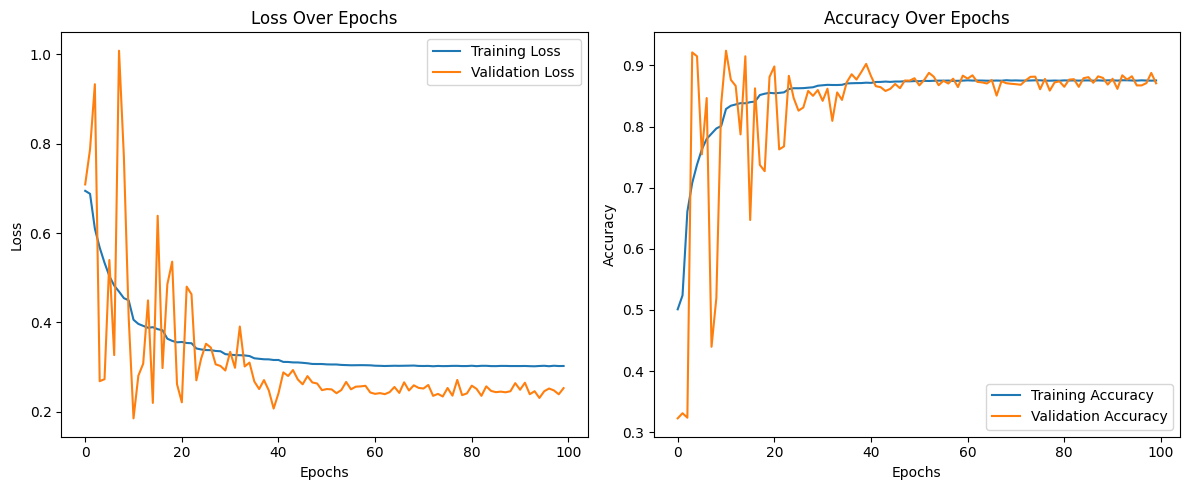

In [4]:
# I'm importing the necessary modules for neural network construction and training.
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# I'm determining whether to use a GPU or CPU based on what's available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Here, I'm defining a class for a feedforward neural network model.
class FFNN(nn.Module):
    def __init__(self, input_dim):
        super(FFNN, self).__init__()
        # I define the first layer, batch normalization, and a dropout layer.
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)

        # Next, the second layer, its batch normalization, and dropout.
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)

        # Then the third layer with batch normalization and dropout.
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.5)

        # Finally, a single output neuron for a binary classification output.
        self.fc4 = nn.Linear(64, 1)

    # This defines the forward pass of the network.
    def forward(self, x):
        # I apply ReLU, batch norm, and dropout in sequence for each layer.
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)

        # The final layer is a linear layer without an activation function.
        x = self.fc4(x)
        return x

# I create the model, specifying the loss function, optimizer, and learning rate scheduler.
model = FFNN(next(iter(train_loader))[0].shape[1]).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)

# I set the number of epochs for training and initialize placeholders for tracking.
epochs = 100
best_val_loss = float('inf')
checkpoint_path = 'best_model.pth'
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# I start the training and validation loop.
for epoch in range(epochs):
    # I initialize trackers for this epoch's training.
    model.train()
    epoch_train_loss, correct_train_preds, total_train_samples = 0.0, 0, 0

    for inputs, labels in train_loader:
        # I transfer the input and label tensors to the appropriate device.
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # I reset the gradients before starting the backpropagation.

        outputs = model(inputs)  # I perform the forward pass.
        loss = criterion(outputs, labels)  # I calculate the loss.
        loss.backward()  # I perform backpropagation.
        optimizer.step()  # I update the model parameters.

        # I accumulate the loss and calculate the number of correct predictions.
        epoch_train_loss += loss.item()
        predicted = (torch.sigmoid(outputs) > 0.5).float()  # I apply a threshold to get binary predictions.
        correct_train_preds += (predicted == labels).float().sum()
        total_train_samples += labels.size(0)

    # I compute and store the training loss and accuracy for this epoch.
    train_losses.append(epoch_train_loss / len(train_loader))
    train_accuracies.append((correct_train_preds / total_train_samples).cpu().numpy())

    # I switch to evaluation mode for validation.
    model.eval()
    epoch_val_loss, correct_val_preds, total_val_samples = 0.0, 0, 0

    with torch.no_grad():  # I turn off gradients for validation to save memory and computation.
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item()

            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val_preds += (predicted == labels).float().sum()
            total_val_samples += labels.size(0)

    # I compute and store the validation loss and accuracy for this epoch.
    val_losses.append(epoch_val_loss / len(test_loader))
    val_accuracies.append((correct_val_preds / total_val_samples).cpu().numpy())

    # Every 10 epochs and on the last epoch, I print out the training and validation metrics.
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]:.4f}, "
              f"Training Accuracy: {train_accuracies[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}, "
              f"Validation Accuracy: {val_accuracies[-1]:.4f}")

    # I adjust the learning rate based on the validation loss.
    scheduler.step(val_losses[-1])

    # If the model has improved, I save its state.
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        torch.save(model.state_dict(), checkpoint_path)
        print(f"Model checkpoint saved at {checkpoint_path}")

# I plot the training and validation loss and accuracy to visually track the training process.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()





### ROC Curve

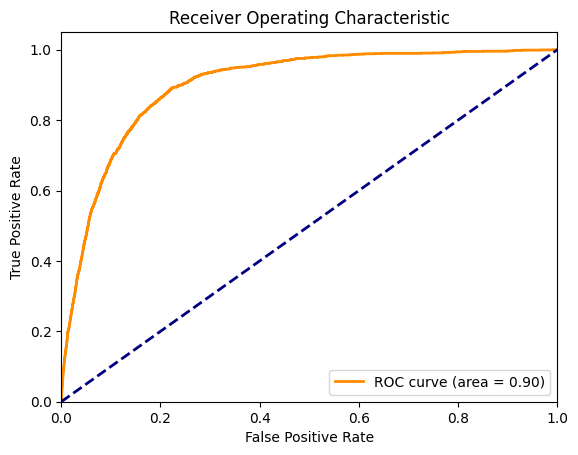

In [9]:
# Importing functions for calculating the ROC curve and area under the curve.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np  # Also need to import numpy for array handling.

# Preparing a list to store the probabilities of the positive class.
all_probabilities = []

# Setting the model to evaluation mode to disable dropout and batch normalization.
model.eval()
with torch.no_grad():  # Disabling gradient calculations to save memory and computations.
    for inputs, _ in test_loader:  # Iterating over the test data loader.
        inputs = inputs.to(device)  # Sending the input data to the same device as the model.
        outputs = model(inputs)  # Forward pass to get the output from the model.
        probabilities = torch.sigmoid(outputs).cpu().numpy()  # Applying sigmoid to get probabilities.
        all_probabilities.extend(probabilities)  # Appending the probabilities to the list.

# Flattening the list of probabilities and converting it to a numpy array for further processing.
all_probabilities = np.vstack(all_probabilities).flatten()

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve.
# 'all_true_labels' should be defined elsewhere in your notebook/script with true binary labels.
fpr, tpr, _ = roc_curve(all_true_labels, all_probabilities)
roc_auc = auc(fpr, tpr)  # Calculating the area under the ROC curve.

# Plotting the ROC curve.
plt.figure()
lw = 2  # Line width for the plot.
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # Plotting the diagonal line for reference.
plt.xlim([0.0, 1.0])  # Setting x-axis limits for the plot.
plt.ylim([0.0, 1.05])  # Setting y-axis limits for the plot.
plt.xlabel('False Positive Rate')  # Label for the x-axis.
plt.ylabel('True Positive Rate')  # Label for the y-axis.
plt.title('Receiver Operating Characteristic')  # Title of the plot.
plt.legend(loc="lower right")  # Adding the legend to the plot at the lower right corner.
plt.show()  # Displaying the plot.




### Confusion Matrix

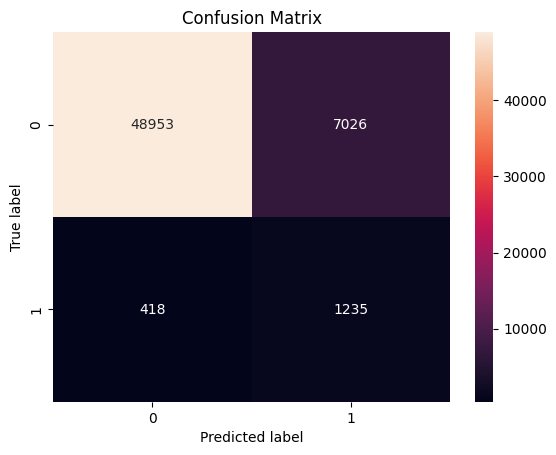

In [8]:
import numpy as np
# Importing the confusion matrix function and seaborn for visualization.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  # To ensure plt is available for plotting.

# Preparing empty lists to store the model's predictions and the actual labels.
all_predictions = []
all_true_labels = []

# Setting the model to evaluation mode, which will turn off features like dropout.
model.eval()
with torch.no_grad():  # Ensuring that no gradient computations are done.
    for i in range(0, len(X_test_tensor), batch_size):  # Looping over the test set in batches.
        # Get the batch of test inputs and labels, move them to the same device as the model.
        inputs = X_test_tensor[i:i+batch_size].to(device)
        labels = y_test_tensor[i:i+batch_size].to(device).view(-1, 1)
        
        outputs = model(inputs)  # Perform a forward pass to get the outputs.

        # Apply a threshold to the outputs to get a binary prediction.
        predictions = (torch.sigmoid(outputs) > 0.5).float()
        
        # Extend the lists with the predictions and the true labels.
        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Flatten the list of predictions and true labels and convert them to numpy arrays for analysis.
all_predictions = np.vstack(all_predictions).flatten()
all_true_labels = np.vstack(all_true_labels).flatten()

# Compute the confusion matrix using sklearn's confusion_matrix function.
cm = confusion_matrix(all_true_labels, all_predictions)

# Using seaborn's heatmap function to visualize the confusion matrix.
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')  # Title for the heatmap.
plt.ylabel('True label')  # Y-axis label for the heatmap.
plt.xlabel('Predicted label')  # X-axis label for the heatmap.
plt.show()  # Displaying the heatmap.


In [8]:
!pip3 install torchviz


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 585.5 kB/s eta 0:00:00 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=bb9c5aaf136a133f2263138494ec63dc817ee892819502fdbf0f53be472613da
  Stored in directory: /Users/gavinthomas/Library/Caches/pip/wheels/5a/d0/3f/b7014553eb74f12892b7d9b69c6083044564712d10fde8dfdc
Successfully built torchviz

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

# Define the feed-forward neural network class
class FFNN(nn.Module):
    def __init__(self, input_dim):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.5)
        
        self.fc4 = nn.Linear(64, 1)
    
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

# Assuming 'input_dim' is known from your dataset
# Replace 'input_dim' with the actual number representing your features
input_dim = 77  # Example input dimension

# Create the model instance
model = FFNN(input_dim)

# Create a dummy input tensor with a batch size larger than 1
# The batch size is 10 in this example
dummy_input = torch.randn(77, input_dim)

# Perform a forward pass to get the model output
# No need to change to eval mode since we have a batch size > 1
output = model(dummy_input)

# Visualize the model architecture
dot = make_dot(output, params=dict(model.named_parameters()))

# Save the visualization as a PNG image
dot.render('network_visualization', format='png')



'network_visualization.png'